<a href="https://colab.research.google.com/github/mohamedxxhechxxbenxxhadid/tactic_sense/blob/hech/google_is_so_awesome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium numpy scikit-learn beautifulsoup4 networkx matplotlib seaborn webdriver-manager requests pandas tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 26.1 MB/s eta 0:00:00


In [ ]:
import os
import kagglehub
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data loading


In [ ]:

# Download latest version
path = kagglehub.dataset_download("stefanoleone992/ea-sports-fc-24-complete-player-dataset")




100%|██████████| 28.0M/28.0M [00:00<00:00, 51.0MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)
print("Subfolders:", os.listdir(path))
players = pd.read_csv(os.path.join(path, "male_players.csv"))


Path to dataset files: /root/.cache/kagglehub/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset/versions/4
Subfolders: ['male_coaches.csv', 'male_players.csv', 'male_teams.csv', 'female_players.csv', 'female_coaches.csv', 'female_teams.csv']


<ipython-input-4-f7fa8427d35e>:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(os.path.join(path, "male_players.csv"))


#data understanding

In [ ]:
players.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


# Our Data have 110 columns of players features we will now see the types of this columns and we will try to make them nuemrical to make the pearson corr and we will use feature eng


In [ ]:
players.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    player_id                       int64  
 1    player_url                      object 
 2    fifa_version                    float64
 3    fifa_update                     float64
 4    update_as_of                    object 
 5    short_name                      object 
 6    long_name                       object 
 7    player_positions                object 
 8    overall                         int64  
 9    potential                       int64  
 10   value_eur                       float64
 11   wage_eur                        float64
 12   age                             int64  
 13   dob                             object 
 14   height_cm                       int64  
 15   weight_kg                       int64  
 16   club_team_id                    float64
 17   club_nam

# we will try to deal with data tha have object type

In [ ]:
object_columns  =  players.dtypes[players.dtypes == 'object']
object_columns

,0
player_url,object
update_as_of,object
short_name,object
long_name,object
player_positions,object
dob,object
club_name,object
league_name,object
club_position,object
club_loaned_from,object


# we will gather the columns that we will drop but before we will do feature eng


In [ ]:
columns_to_drop = ['club_loaned_from','club_joined_date','nationality_name','nation_position','player_tags','real_face','club_name','club_position','long_name','short_name','player_url','update_as_of','player_traits','player_positions','league_name','body_type','dob','work_rate','preferred_foot']
players[columns_to_drop]

,club_loaned_from,club_joined_date,nationality_name,nation_position,player_tags,real_face,club_name,club_position,long_name,short_name,player_url,update_as_of,player_traits,player_positions,league_name,body_type,dob,work_rate,preferred_foot
0,NaN,2018-07-01,France,LW,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...",Yes,Paris Saint Germain,LW,Kylian Mbappé Lottin,K. Mbappé,/player/231747/kylian-mbappe/240002,2023-09-22,"Quick Step +, Rapid, Flair, Trivela","ST, LW",Ligue 1,Unique,1998-12-20,High/Low,Right
1,NaN,2022-07-01,Norway,ST,"#Aerial threat, #Distance shooter, #Strength, ...",Yes,Manchester City,ST,Erling Braut Haaland,E. Haaland,/player/239085/erling-haaland/240002,2023-09-22,"Acrobatic +, Power Header, Quick Step",ST,Premier League,Unique,2000-07-21,High/Medium,Left
2,NaN,2015-08-30,Belgium,CAM,"#Dribbler, #Playmaker, #Distance shooter, #Cro...",Yes,Manchester City,SUB,Kevin De Bruyne,K. De Bruyne,/player/192985/kevin-de-bruyne/240002,2023-09-22,"Pinged Pass +, Dead Ball, Incisive Pass, Long ...","CM, CAM",Premier League,Unique,1991-06-28,High/Medium,Right
3,NaN,2023-07-16,Argentina,RW,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...",Yes,Inter Miami,RF,Lionel Andrés Messi Cuccittini,L. Messi,/player/158023/lionel-messi/240002,2023-09-22,"Technical +, Finesse Shot, Dead Ball, Pinged P...","CF, CAM",Major League Soccer,Unique,1987-06-24,Low/Low,Left
4,NaN,2023-07-01,France,NaN,"#Poacher, #Aerial threat, #Clinical finisher, ...",Yes,Al Ittihad,RS,Karim Benzema,K. Benzema,/player/165153/karim-benzema/240002,2023-09-22,"Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...","CF, ST",Pro League,Normal (170-185),1987-12-19,Medium/Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,NaN,2013-10-22,Wales,NaN,NaN,No,Newport County,RES,Ellis Redman,E. Redman,https://sofifa.com/player/220806/ellis-redman/...,2014-09-18,NaN,CB,League Two,Normal (185+),1996-09-26,Medium/Medium,Right
180017,NaN,2014-08-14,Wales,NaN,NaN,No,Newport County,RES,Aaron Graham John Collins,A. Collins,https://sofifa.com/player/225509/aaron-collins...,2014-09-18,NaN,ST,League Two,Lean (170-185),1997-06-01,Medium/Medium,Right
180018,NaN,2012-07-01,Poland,NaN,NaN,No,Wisła Kraków,RES,Piotr Żemło,P. Żemło,https://sofifa.com/player/217591/piotr-zemlo/1...,2014-09-18,NaN,"LM, LB",Ekstraklasa,Normal (185+),1995-07-10,Medium/Medium,Left
180019,NaN,2014-03-11,England,NaN,NaN,No,Fleetwood Town,RES,Thomas Christopher Davies,T. Davies,https://sofifa.com/player/222947/tom-davies/15...,2014-09-18,NaN,CB,League One,Normal (170-185),1992-04-18,Medium/Medium,Right


In [ ]:
def custom_onehot_complex(col_name,data,new_columns):
  skills = ", ".join(data[col_name].explode().dropna().astype(str).unique())
  skills = skills.split(", ")

  skills = list( dict.fromkeys(skills) )
  new_columns.extend(skills)
  for skill in skills :
    data[skill] = 0
  data
  for index, row in data.iterrows():
    for skill in row[col_name]:
      data.at[index, skill] = 1
  return data,new_columns

In [ ]:
def custom_onehot_simple(col_name,data,new_columns):
  columns = data[col_name].unique()
  new_columns.extend(columns)
  for column in columns :
    data[column] = 0
  data
  for index, row in data.iterrows():
    data.at[index, row[col_name]] = 1
  return data,new_columns

In [ ]:
players['player_tags'] = players['player_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else [] )
players['player_traits'] = players['player_traits'].apply(lambda x: x.split(',') if isinstance(x, str) else [] )
players['work_rate'] = players['work_rate'].apply(lambda x: x.split('/') if isinstance(x, str) else [] )
players['player_tags'] = players['player_tags'].apply(lambda x: [y.strip().replace('#','') for y in x ])

new_columns=[]

players,new_columns = custom_onehot_complex('player_tags',players,new_columns)
players,new_columns = custom_onehot_complex('player_traits',players,new_columns)
players,new_columns = custom_onehot_complex('work_rate',players,new_columns)
players,new_columns = custom_onehot_simple('preferred_foot',players,new_columns)
players,new_columns = custom_onehot_simple('body_type',players,new_columns)
print(new_columns)

['Speedster', 'Dribbler', 'Acrobat', 'Clinical finisher', 'Complete forward', 'Aerial threat', 'Distance shooter', 'Strength', 'Playmaker', 'Crosser', 'Complete midfielder', 'FK Specialist', 'Poacher', 'Tackling', 'Tactician', 'Complete defender', 'Engine', 'Clinical Finisher', 'Complete Forward', 'Distance Shooter', 'Aerial Threat', 'Complete Midfielder', 'Complete Defender', 'Quick Step +', ' Rapid', ' Flair', ' Trivela', 'Acrobatic +', ' Power Header', ' Quick Step', 'Pinged Pass +', ' Dead Ball', ' Incisive Pass', ' Long Ball Pass', ' Whipped Cross', 'Technical +', ' Finesse Shot', ' Pinged Pass', ' Tiki Taka', 'Finesse Shot +', ' First Touch', ' Relentless', 'Power Header +', ' Chip Shot', ' Power Shot', 'Far Throw', 'Power Shot +', ' Bruiser', 'Bruiser +', ' Block', ' Aerial', 'Trickster +', ' Technical', 'Footwork', 'Block +', ' Slide Tackle', 'Aerial +', ' Jockey', ' Anticipate', 'Power Shot', 'Chip Shot', ' Acrobatic', 'Long Ball Pass +', ' Press Proven', 'Trivela +', 'Technic

# so now we can see the new columns added which they are binary wel will use them for prediction for players skills or for grouping ..


In [ ]:
players[new_columns]

,Speedster,Dribbler,Acrobat,Clinical finisher,Complete forward,Aerial threat,Distance shooter,Strength,Playmaker,Crosser,...,Unique,Normal (170-185),Lean (170-185),Normal (185+),Lean (185+),Normal (170-),Stocky (185+),Stocky (170-185),Lean (170-),Stocky (170-)
0,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
180017,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
180018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
180019,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
players = players.drop(columns_to_drop,axis=1)

# changing position rate to numeric

In [ ]:
def add_rate(rate):
  s=0
  if isinstance(rate,list):
    for i in rate :

      s=s+i
  else:
    s=rate
  return s
def changing_rate(col_name,data):
  data[col_name] = data[col_name].apply(lambda x: str(x))
  data[col_name] = data[col_name].apply(lambda x: [int(x.split('+')[0]),int(x.split('+')[1])] if '+' in x and isinstance(x,str) else [int(x.split('-')[0]),-int(x.split('-')[1])] if '-' in x and isinstance(x,str) else x  )
  data[col_name] = data[col_name].apply(lambda x: add_rate(x) if isinstance(x, list) else x)
  return data[col_name]



In [ ]:
position_columns = list(players.dtypes[players.dtypes == 'object'].index)
for position in players.dtypes[players.dtypes == 'object'].index:
  print(position)
  players[position] = changing_rate(position,players)
  players[position] = pd.to_numeric(players[position])

ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk


# we romeved all the object data

In [ ]:
players.dtypes[players.dtypes == 'object']

,0


In [ ]:
players.drop(new_columns,axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 90 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   player_id                       180021 non-null  int64  
 1   fifa_version                    180021 non-null  float64
 2   fifa_update                     180021 non-null  float64
 3   overall                         180021 non-null  int64  
 4   potential                       180021 non-null  int64  
 5   value_eur                       177868 non-null  float64
 6   wage_eur                        178173 non-null  float64
 7   age                             180021 non-null  int64  
 8   height_cm                       180021 non-null  int64  
 9   weight_kg                       180021 non-null  int64  
 10  club_team_id                    178156 non-null  float64
 11  league_id                       178156 non-null  float64
 12  league_level    

# now we will try to eliminate columns or features that we don t need


In [ ]:
columns_that_we_dont_need = ['club_team_id','league_id','club_jersey_number','club_contract_valid_until_year','nationality_id','nation_team_id','nation_jersey_number','fifa_update','value_eur','release_clause_eur']
players = players.drop(columns_that_we_dont_need,axis=1)

In [ ]:
position_columns

['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [ ]:
players.drop(new_columns+list(position_columns),axis=1).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    180021 non-null  int64  
 1   fifa_version                 180021 non-null  float64
 2   overall                      180021 non-null  int64  
 3   potential                    180021 non-null  int64  
 4   wage_eur                     178173 non-null  float64
 5   age                          180021 non-null  int64  
 6   height_cm                    180021 non-null  int64  
 7   weight_kg                    180021 non-null  int64  
 8   league_level                 177771 non-null  float64
 9   weak_foot                    180021 non-null  int64  
 10  skill_moves                  180021 non-null  int64  
 11  international_reputation     180021 non-null  int64  
 12  pace                         159997 non-null  float64
 13 

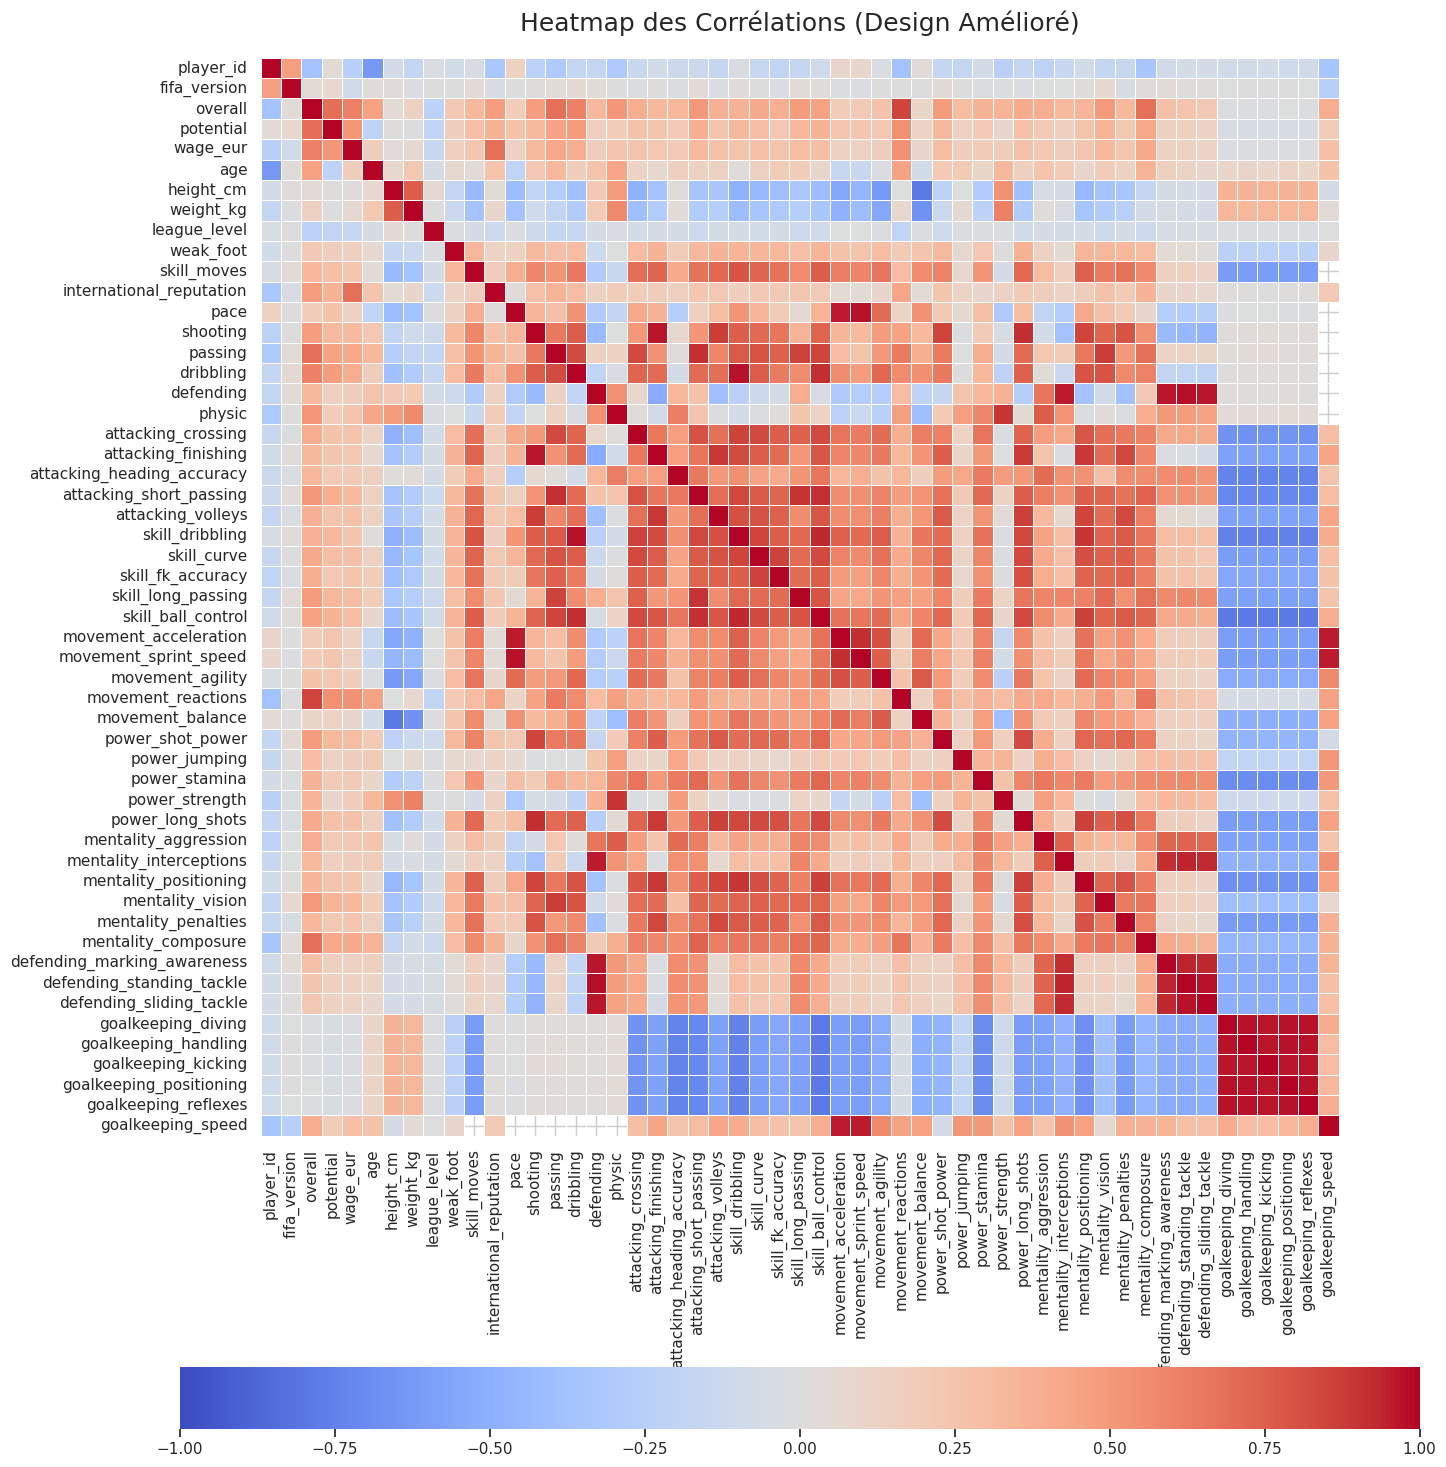

In [ ]:
correlation_matrix = players.drop(new_columns+list(position_columns),axis=1).corr(method='pearson')

plt.figure(figsize=(20, 20))

# Appliquer un style plus moderne
sns.set(style="whitegrid")

# Générer la heatmap avec un design amélioré
sns.heatmap(correlation_matrix,
            cmap="coolwarm",
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "orientation": "horizontal"})  # Barre horizontale

# Ajouter un titre
plt.title("Heatmap des Corrélations (Design Amélioré)", fontsize=18, pad=20)

# Afficher le graphique
plt.show()

# we can see that every skills with the goalkeeper should be dropped because a goalkeeper is a unique position and need hands ..

In [ ]:
gk_to_drop = ['goalkeeping_speed','goalkeeping_reflexes','goalkeeping_handling','goalkeeping_positioning','goalkeeping_kicking','goalkeeping_diving']
players = players.drop(gk_to_drop,axis=1)

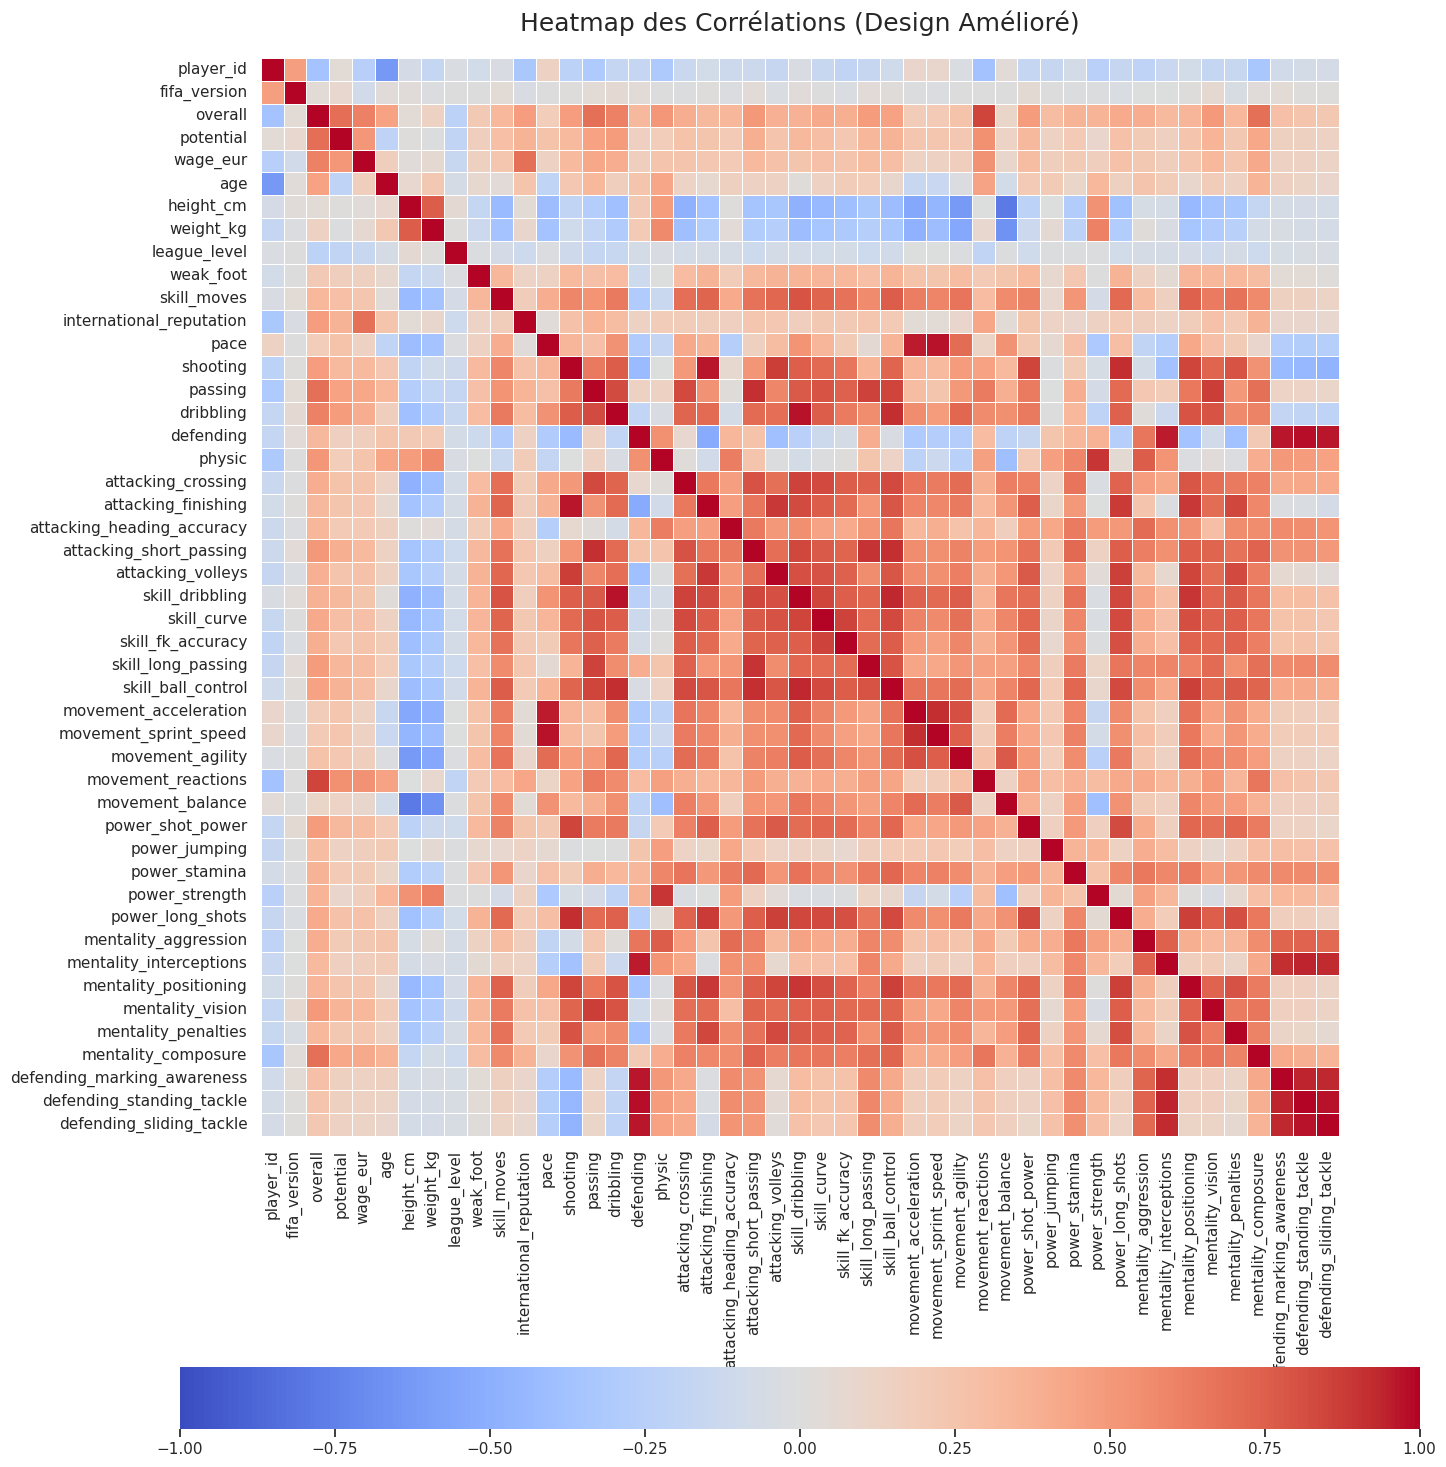

In [ ]:
correlation_matrix = players.drop(new_columns+list(position_columns),axis=1).corr(method='pearson')

plt.figure(figsize=(20, 20))

# Appliquer un style plus moderne
sns.set(style="whitegrid")

# Générer la heatmap avec un design amélioré
sns.heatmap(correlation_matrix,
            cmap="coolwarm",
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "orientation": "horizontal"})  # Barre horizontale

# Ajouter un titre
plt.title("Heatmap des Corrélations (Design Amélioré)", fontsize=18, pad=20)

# Afficher le graphique
plt.show()

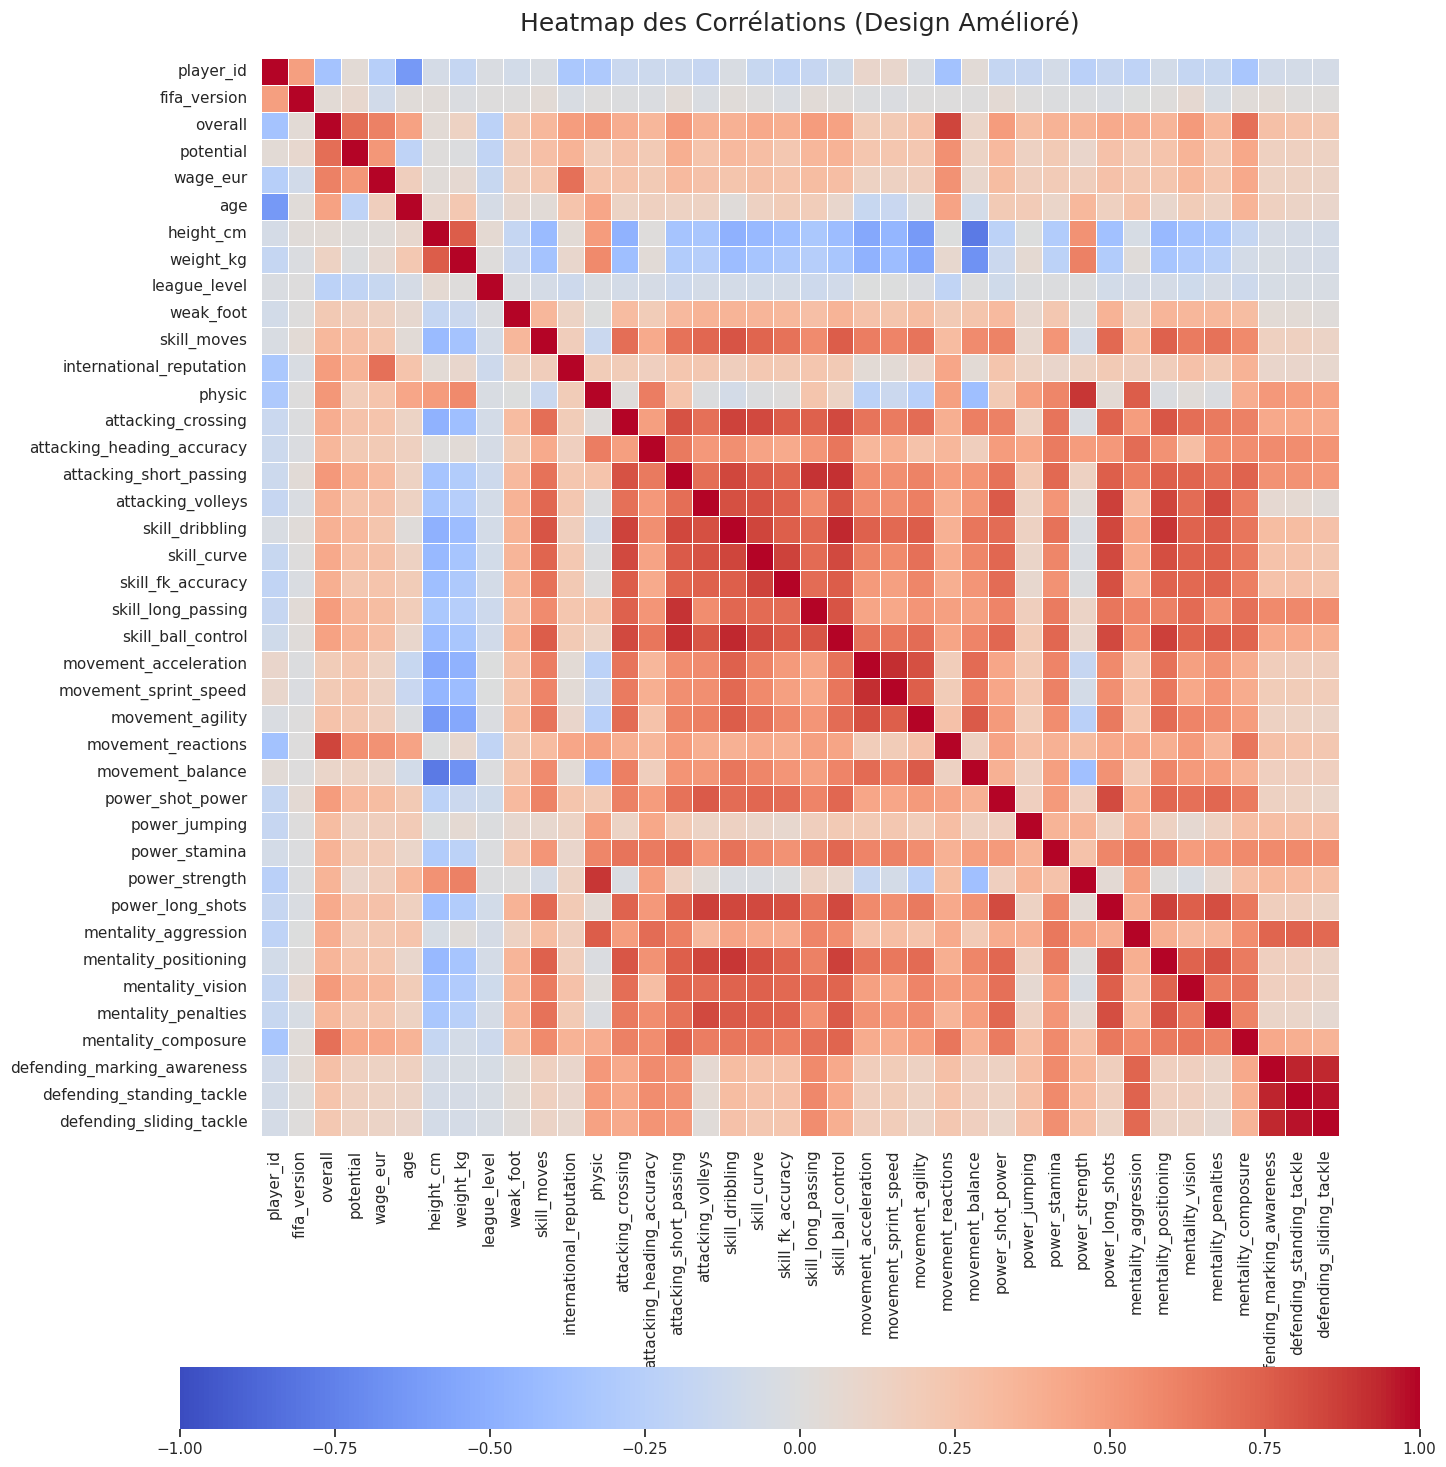

In [ ]:
other_cols_to_drop = ['defending','mentality_interceptions','pace','attacking_finishing','shooting','dribbling','passing']
players = players.drop(other_cols_to_drop,axis=1)
correlation_matrix = players.drop(new_columns+list(position_columns),axis=1).corr(method='pearson')

plt.figure(figsize=(20, 20))

# Appliquer un style plus moderne
sns.set(style="whitegrid")

# Générer la heatmap avec un design amélioré
sns.heatmap(correlation_matrix,
            cmap="coolwarm",
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "orientation": "horizontal"})  # Barre horizontale

# Ajouter un titre
plt.title("Heatmap des Corrélations (Design Amélioré)", fontsize=18, pad=20)

# Afficher le graphique
plt.show()

In [ ]:
players.drop(new_columns+list(position_columns)+['player_id','fifa_version'],axis=1).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      180021 non-null  int64  
 1   potential                    180021 non-null  int64  
 2   wage_eur                     178173 non-null  float64
 3   age                          180021 non-null  int64  
 4   height_cm                    180021 non-null  int64  
 5   weight_kg                    180021 non-null  int64  
 6   league_level                 177771 non-null  float64
 7   weak_foot                    180021 non-null  int64  
 8   skill_moves                  180021 non-null  int64  
 9   international_reputation     180021 non-null  int64  
 10  physic                       159997 non-null  float64
 11  attacking_crossing           180021 non-null  int64  
 12  attacking_heading_accuracy   180021 non-null  int64  
 13 

In [ ]:
df = players.drop(new_columns+['player_id','fifa_version','overall'],axis=1)

df['wage_eur'].fillna(df['wage_eur'].mean(), inplace=True)
df['league_level'].fillna(df['league_level'].mean(), inplace=True)
df['physic'].fillna(df['physic'].mean(), inplace=True)
df['mentality_composure'].fillna(df['mentality_composure'].mean(), inplace=True)


<ipython-input-26-8d2231c01b84>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wage_eur'].fillna(df['wage_eur'].mean(), inplace=True)
<ipython-input-26-8d2231c01b84>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Epoch 1/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 484.7798 - mse: 484.7798 - val_loss: 5.8347 - val_mse: 5.8347
Epoch 2/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.6282 - mse: 4.6282 - val_loss: 2.3348 - val_mse: 2.3348
Epoch 3/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.9926 - mse: 1.9926 - val_loss: 1.4937 - val_mse: 1.4937
Epoch 4/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.5352 - mse: 1.5352 - val_loss: 1.4511 - val_mse: 1.4511
Epoch 5/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.4675 - mse: 1.4675 - val_loss: 1.4137 - val_mse: 1.4137
Epoch 6/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.4124 - mse: 1.4124 - val_loss: 1.3034 - val_mse: 1.3034
Epoch 7/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.3644 - mse: 1.3644 - val_loss: 1.3547 - val_mse: 1.3547
Epoch 8/30
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.3306 - mse: 1.3306 - val_loss: 1.3442 - val_mse: 1.3442
Epoch 9/30
3938/3938 ━━━━━━━

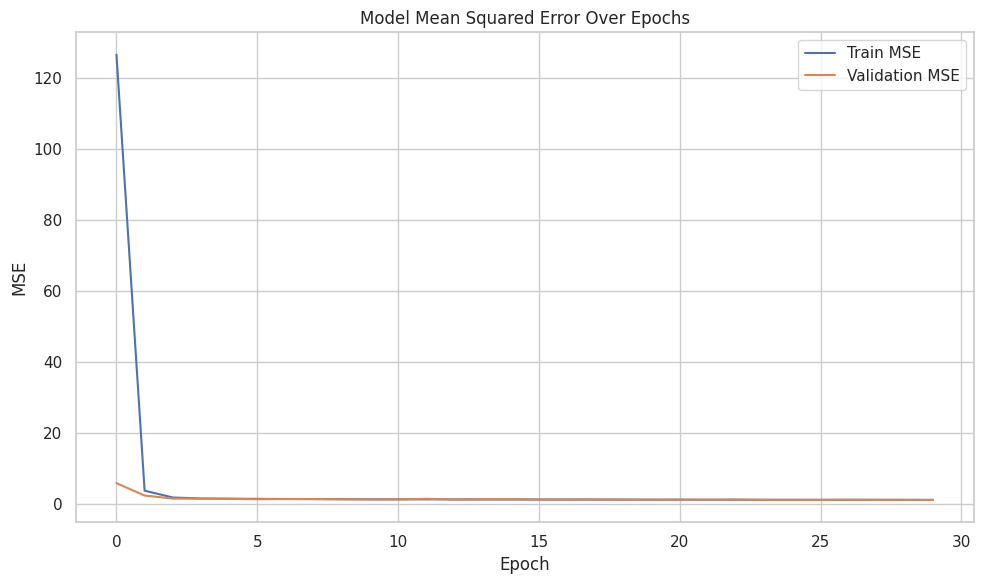

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

X = df.drop(list(position_columns), axis=1)
y = df[list(position_columns)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(37,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(list(position_columns)), activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train Model and Save History
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Evaluate Model
mse = model.evaluate(X_val, y_val)
print(f'Validation MSE: {mse}')
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate R² Score (Model Accuracy)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Training R² Score: {train_r2:.2f}')
print(f'Validation R² Score: {val_r2:.2f}')

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Training R² Score: 0.99
Validation R² Score: 0.99


In [ ]:
player_test = players[players['player_id'] == 231747].iloc[0]
player_test = player_test.drop(list(position_columns)+new_columns+['player_id','fifa_version','overall'])
len(player_test)

37

In [ ]:
players_to_choose = pd.read_csv(os.path.join(path, "male_players.csv"))

players_to_choose.info(verbose=True)

<ipython-input-64-d4cdc22340eb>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_to_choose = pd.read_csv(os.path.join(path, "male_players.csv"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    player_id                       int64  
 1    player_url                      object 
 2    fifa_version                    float64
 3    fifa_update                     float64
 4    update_as_of                    object 
 5    short_name                      object 
 6    long_name                       object 
 7    player_positions                object 
 8    overall                         int64  
 9    potential                       int64  
 10   value_eur                       float64
 11   wage_eur                        float64
 12   age                             int64  
 13   dob                             object 
 14   height_cm                       int64  
 15   weight_kg                       int64  
 16   club_team_id                    float64
 17   club_nam

In [ ]:
players_to_choose = players_to_choose[(players_to_choose['fifa_version'] == 24) & (players_to_choose['club_name'] == 'Real Madrid')]
player_indices = players_to_choose[(players_to_choose['fifa_version'] == 24) &
                                   (players_to_choose['club_name'] == 'Real Madrid')].index.tolist()

In [ ]:
df_players_to_choose = df.loc[player_indices]
df_players_to_choose.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 6 to 13837
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   potential                    33 non-null     int64  
 1   wage_eur                     33 non-null     float64
 2   age                          33 non-null     int64  
 3   height_cm                    33 non-null     int64  
 4   weight_kg                    33 non-null     int64  
 5   league_level                 33 non-null     float64
 6   weak_foot                    33 non-null     int64  
 7   skill_moves                  33 non-null     int64  
 8   international_reputation     33 non-null     int64  
 9   physic                       33 non-null     float64
 10  attacking_crossing           33 non-null     int64  
 11  attacking_heading_accuracy   33 non-null     int64  
 12  attacking_short_passing      33 non-null     int64  
 13  attacking_volleys       

In [ ]:
position_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
                    'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                    'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

In [ ]:
df_players_to_choose = df_players_to_choose[position_columns]
df_players_to_choose

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
6,35,35,35,30,31,31,31,30,35,35,...,34,34,34,32,32,32,32,32,32,90
8,85,85,85,88,86,86,86,88,89,89,...,61,61,61,65,60,48,48,48,60,19
17,85,85,85,85,85,85,85,85,89,89,...,88,88,88,87,86,83,83,83,86,21
33,79,79,79,83,82,82,82,83,87,87,...,84,84,84,84,81,74,74,74,81,22
39,83,83,83,82,83,83,83,82,87,87,...,86,86,86,84,83,82,82,82,83,21
43,71,71,71,69,69,69,69,69,72,72,...,84,84,84,84,86,88,88,88,86,23
50,79,79,79,79,80,80,80,79,85,85,...,83,83,83,79,76,74,74,74,76,21
61,84,84,84,84,84,84,84,84,87,87,...,60,60,60,65,61,49,49,49,61,19
78,80,80,80,79,79,79,79,79,83,83,...,85,85,85,85,85,85,85,85,85,21
81,70,70,70,66,67,67,67,66,70,70,...,84,84,84,81,83,85,85,85,83,23


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment


target_positions = {
    'cb1': 'cb',
    'cb2': 'cb',
    'lb': 'lb',
    'rb': 'rb',
    'cdm': 'cdm',
    'ram1': 'ram',
    'ram2': 'ram',
    'st': 'st',
    'lw': 'lw',
    'rm': 'rm',
    'gk': 'gk'
}

num_players_needed = len(target_positions)

position_columns = list(set(target_positions.values()))
player_positions_data = df_players_to_choose[position_columns].copy()

for pos in target_positions.values():
    if pos not in player_positions_data.columns:
        player_positions_data[pos] = 0

suitability_matrix = np.zeros((len(df), num_players_needed))
player_names = df.index.tolist() if 'player_name' in df else [f"Player {i}" for i in range(len(df))]
target_position_names = list(target_positions.keys())

for i, player_row in player_positions_data.iterrows():
    for j, target_pos_name in enumerate(target_positions):
        suitability_matrix[i, j] = player_row[target_positions[target_pos_name]]


cost_matrix = np.max(suitability_matrix) - suitability_matrix

row_ind, col_ind = linear_sum_assignment(cost_matrix)


assignments_df = pd.DataFrame({
    'Player_Index': row_ind,
    'Player': [player_names[i] for i in row_ind],
    'Target_Position_Index': col_ind,
    'Target_Position': [target_position_names[i] for i in col_ind],
    'Assigned_Position': [target_positions[target_position_names[i]] for i in col_ind],
    'Suitability': suitability_matrix[row_ind, col_ind],
    'Cost': cost_matrix[row_ind, col_ind]
})

assignments_df

,Player_Index,Player,Target_Position_Index,Target_Position,Assigned_Position,Suitability,Cost
0,6,Player 6,10,gk,gk,90.0,0.0
1,8,Player 8,8,lw,lw,88.0,2.0
2,17,Player 17,2,lb,lb,86.0,4.0
3,33,Player 33,9,rm,rm,87.0,3.0
4,39,Player 39,5,ram1,ram,87.0,3.0
5,43,Player 43,0,cb1,cb,88.0,2.0
6,50,Player 50,6,ram2,ram,85.0,5.0
7,61,Player 61,7,st,st,84.0,6.0
8,78,Player 78,3,rb,rb,85.0,5.0
9,81,Player 81,1,cb2,cb,85.0,5.0


In [ ]:
assignments_df['Player_Index'].tolist()

[6, 8, 17, 33, 39, 43, 50, 61, 78, 81, 91]

In [ ]:
for i in assignments_df['Player_Index'].tolist():
  print(players_to_choose.loc[i]['short_name'])

T. Courtois
Vini Jr.
F. Valverde
L. Modrić
J. Bellingham
Éder Militão
T. Kroos
Rodrygo
D. Alaba
A. Rüdiger
A. Tchouaméni
